In [83]:
import pandas as pd
import seaborn as sns

In [5]:
tweets_df=pd.read_csv("tweets_df.csv")

In [6]:
tweets_df

,ID,Text,Date,Author ID,Author Name,Author Username,Retweets,Replies,Likes,Quotes
0,1659514560200470559,Ayer visitamos a los alumnos de @TheBridge_Tec...,2023-05-19,987047282,A3Sec,a3sec,1,0,3,1
1,1659136842854219776,¿Qué hacían nuestros alumni antes del #bootcam...,2023-05-18,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
2,1658825158994403329,"#MLMonitoring and #Observability, mar, 23 may ...",2023-05-17,41545659,Mario Lopez de Avila,nodosenlared,1,0,3,0
3,1658791064306688002,Nos colamos en el campus de #Bilbao para descu...,2023-05-17,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0
4,1658430987368386566,Así es el #bootcamp de #UXUIProductDesign que ...,2023-05-16,1162694149956603904,The Bridge,TheBridge_Tech,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
138,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15,1162694149956603904,The Bridge,TheBridge_Tech,2,1,2,0
139,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15,1162694149956603904,The Bridge,TheBridge_Tech,0,0,2,0
140,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,2,1,10,0
141,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13,1162694149956603904,The Bridge,TheBridge_Tech,2,0,1,0


In [7]:
tabla_tweets=tweets_df[["ID","Text","Date","Author ID","Retweets","Replies","Likes","Quotes"]]
tabla_usuarios=tweets_df[["Author ID","Author Name","Author Username"]]

In [21]:
print(tabla_usuarios)
print(tabla_tweets)

               Author ID           Author Name  Author Username
0              987047282                 A3Sec            a3sec
1    1162694149956603904            The Bridge   TheBridge_Tech
2               41545659  Mario Lopez de Avila     nodosenlared
3    1162694149956603904            The Bridge   TheBridge_Tech
4    1162694149956603904            The Bridge   TheBridge_Tech
..                   ...                   ...              ...
138  1162694149956603904            The Bridge   TheBridge_Tech
139  1162694149956603904            The Bridge   TheBridge_Tech
140  1530194743786881024       Bitcoin Tuesday  BitcoinTuesday_
141  1162694149956603904            The Bridge   TheBridge_Tech
142           4899284631          My Tech Plan     my_tech_plan

[143 rows x 3 columns]
                      ID                                               Text   
0    1659514560200470559  Ayer visitamos a los alumnos de @TheBridge_Tec...  \
1    1659136842854219776  ¿Qué hacían nuestros alu

In [12]:
import sklearn
import pickle

def es_archivo_pickle(archivo):
    try:
        with open(archivo, 'rb') as f:
            pickle.load(f)
        return True
    except pickle.UnpicklingError:
        return False

# Ejemplo de uso
archivo = 'sentiment_model'
if es_archivo_pickle(archivo):
    print(f"El archivo {archivo} se puede abrir con pickle.")
else:
    print(f"El archivo {archivo} no se puede abrir con pickle.")


El archivo sentiment_model se puede abrir con pickle.


In [13]:
with open('sentiment_model.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [11]:
modelo_cargado

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [ ]:
'''El modelo que tienes es un clasificador de análisis de sentimiento basado en regresión logística 
y utiliza un vectorizador de conteo (CountVectorizer) para convertir los textos en características numéricas que el modelo puede entender. 
Aquí hay una descripción de cada componente del modelo:

--CountVectorizer: Es una técnica de representación de texto que convierte los documentos de texto en una matriz 
numérica que representa la frecuencia de ocurrencia de cada palabra o n-grama en el texto. Los parámetros utilizados en este caso son:

    *max_df: Elimina automáticamente las palabras que aparecen en más del 50% de los documentos, lo que ayuda a eliminar palabras 
comunes que no aportan mucha información.
    *max_features: Limita el número máximo de características (palabras o n-gramas) que se utilizarán. 
En este caso, se limita a 1000 características más frecuentes.
    *min_df: Elimina automáticamente las palabras que aparecen en menos de 5 documentos, lo que ayuda a eliminar 
palabras poco frecuentes que pueden ser ruido.
    *ngram_range: Especifica el rango de longitud de n-gramas que se generarán a partir del texto. En este caso, se utilizan tanto 
palabras individuales (unigramas) como pares de palabras consecutivas (bigramas).

--LogisticRegression: Es un algoritmo de aprendizaje supervisado utilizado para la clasificación binaria o multiclase. 
En este caso, se utiliza una regresión logística con el parámetro de regularización C establecido en 0.5. Un valor más bajo de C indica una 
regularización más fuerte, lo que ayuda a evitar el sobreajuste del modelo.

El modelo de pipeline combina el vectorizador de conteo y el clasificador de regresión logística en una secuencia para formar un flujo de 
trabajo de procesamiento de texto completo. El vectorizador de conteo se aplica primero para convertir los textos en características numéricas, 
y luego estas características se utilizan como entrada para el clasificador de regresión logística, que realiza la tarea de clasificación de sentimiento.'''

In [13]:
print(type(modelo_cargado))


<class 'sklearn.pipeline.Pipeline'>


In [14]:
print(modelo_cargado)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])


In [29]:
tabla_tweets.iloc[0][1]

'Ayer visitamos a los alumnos de @TheBridge_Tech  para charlar con ellos sobre las capacidades en prevención y detección de #ciberseguridad de @a3sec  y compartir experiencias que les puedan ayudar en su incorporación al mundo laboral.\n¡Gracias por la invitación! https://t.co/r1YVULrSOl'

In [14]:
nuevos_datos = [tabla_tweets.iloc[0][1], tabla_tweets.iloc[1][1],tabla_tweets.iloc[2][1]]
predicciones = modelo_cargado.predict(nuevos_datos)
print(predicciones)


[1 0 1]


In [15]:
modelo_cargado.predict_proba(nuevos_datos)

array([[0.31023525, 0.68976475],
       [0.54006418, 0.45993582],
       [0.30736174, 0.69263826]])

In [16]:
tabla_tweets.iloc[1][1]

'¿Qué hacían nuestros alumni antes del #bootcamp?\n\nAsí fue el Open Day de #Sevilla donde compartieron su experiencia, dudas, miedos y sus ganas de hacer un cambio en su carrera 🚀\n\n¿Ready para el cambio?\n\n¡Últimas plazas!👉https://t.co/4DRdoJhQqv\n\n@camaradesevilla @ENCamaraSevilla https://t.co/6VJRsx67Fx'

In [42]:
pred=modelo_cargado.predict([tabla_tweets.iloc[0][1]])
pred[0]

1

In [49]:
resultado=[]

for i in range(len(tabla_tweets["Text"])):
    pred=modelo_cargado.predict([tabla_tweets.iloc[i][1]])
    resultado.append(pred[0])
    
print(resultado)

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]


In [76]:
df_res=pd.DataFrame(resultado, columns=["predict"])

print(df_res)

     predict
0          1
1          0
2          1
3          0
4          0
..       ...
138        1
139        0
140        0
141        0
142        1

[143 rows x 1 columns]


In [78]:
df_res.value_counts() #80 negativos y 63 positivos

predict
0          80
1          63
Name: count, dtype: int64

In [58]:
import numpy as np

resultado_prob = [modelo_cargado.predict_proba([tabla_tweets.iloc[i][1]])[0].tolist() for i in range(len(tabla_tweets["Text"]))]

print(resultado_prob)

[[0.31023524531148505, 0.689764754688515], [0.5400641838802334, 0.4599358161197667], [0.3073617426863293, 0.6926382573136707], [0.8642002023819195, 0.13579979761808053], [0.5115724823224083, 0.48842751767759174], [0.7530570716700243, 0.24694292832997566], [0.2945518045538049, 0.7054481954461951], [0.5437637667955071, 0.45623623320449286], [0.3073617426863293, 0.6926382573136707], [0.5474585270836533, 0.4525414729163467], [0.7342251798860439, 0.26577482011395615], [0.8746403340629206, 0.1253596659370794], [0.3906412449945007, 0.6093587550054993], [0.5474585270836533, 0.4525414729163467], [0.5022430851119355, 0.49775691488806456], [0.4476710607154555, 0.5523289392845445], [0.5034676440614226, 0.49653235593857736], [0.5437637667955071, 0.45623623320449286], [0.7848432373054868, 0.21515676269451317], [0.5437637667955071, 0.45623623320449286], [0.5763173022944181, 0.4236826977055818], [0.5437637667955071, 0.45623623320449286], [0.5474585270836533, 0.4525414729163467], [0.3870995323853579, 0

In [60]:
df_prob=pd.DataFrame(resultado_prob, columns=["0", "1"])

print(df_prob)

            0         1
0    0.310235  0.689765
1    0.540064  0.459936
2    0.307362  0.692638
3    0.864200  0.135800
4    0.511572  0.488428
..        ...       ...
138  0.253578  0.746422
139  0.547459  0.452541
140  0.919282  0.080718
141  0.547459  0.452541
142  0.442896  0.557104

[143 rows x 2 columns]


In [71]:
print(df_prob[df_prob["1"]==df_prob["1"].max()]) #El tweet más claramente positivo
print(tweets_df.iloc[83][1])

          0        1
83  0.09558  0.90442
¡Presentamos cartelón para #DatabeerSVQ19! Nos vemos el jueves 23 a las 19.00 en la sede de @sngular para celebrar la llegada de la primavera con cervezas y datos🍻👩‍💻 @SVQ_tech, ¡no te lo pierdas!

Con la colaboración de @opensistemas @sngular @TheBridge_Tech https://t.co/aYbq2IpbcI


In [73]:
print(df_prob[df_prob["1"]==df_prob["1"].min()]) #El tweet más claramente negativo
print(tweets_df.iloc[85][1])

           0         1
85  0.967224  0.032776
@snowded at @TheBridge_Tech @TheCynefinCo #EstuarineMapping #Strategy #Change "Understanding the dispositional state of the system in the present" https://t.co/t0l3KJlvbc


In [ ]:
#En el siguiente notebook voy a limpiar los textos y después volveré a hacer las predicciones.
#EN REALIDAD VEO QUE EL MODELO YA INCLUYE UN COUNTVECTORIZER EN EL PIPELINE, POR LO QUE NO TIENE SENTIDO QUE SE LO APLIQUE YO TAMBIÉN

In [ ]:
#Voy a crear un nuevo dataset con la información de los tweets pero le añado la columna "pos" que indique la probabilidad de que sea positivo

In [82]:
tweets_df["pos"]=df_prob["1"]
tweets_df

,ID,Text,Date,Author ID,Author Name,Author Username,Retweets,Replies,Likes,Quotes,pos
0,1659514560200470559,Ayer visitamos a los alumnos de @TheBridge_Tec...,2023-05-19,987047282,A3Sec,a3sec,1,0,3,1,0.689765
1,1659136842854219776,¿Qué hacían nuestros alumni antes del #bootcam...,2023-05-18,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0,0.459936
2,1658825158994403329,"#MLMonitoring and #Observability, mar, 23 may ...",2023-05-17,41545659,Mario Lopez de Avila,nodosenlared,1,0,3,0,0.692638
3,1658791064306688002,Nos colamos en el campus de #Bilbao para descu...,2023-05-17,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0,0.135800
4,1658430987368386566,Así es el #bootcamp de #UXUIProductDesign que ...,2023-05-16,1162694149956603904,The Bridge,TheBridge_Tech,1,0,3,0,0.488428
...,...,...,...,...,...,...,...,...,...,...,...
138,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15,1162694149956603904,The Bridge,TheBridge_Tech,2,1,2,0,0.746422
139,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15,1162694149956603904,The Bridge,TheBridge_Tech,0,0,2,0,0.452541
140,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,2,1,10,0,0.080718
141,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13,1162694149956603904,The Bridge,TheBridge_Tech,2,0,1,0,0.452541


<Axes: >

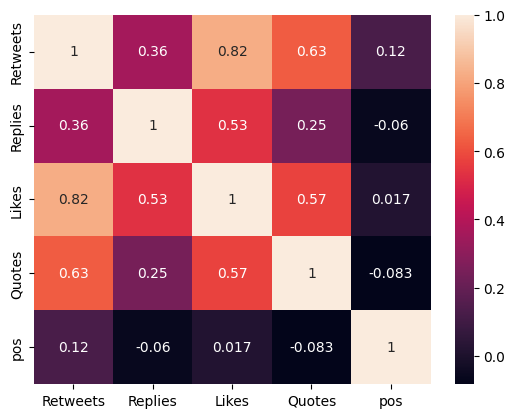

In [85]:
#Hago el heatmap nuevamente para ver si hay correlación entre "pos" y las métricas
metricas=tweets_df[["Retweets","Replies","Likes","Quotes","pos"]]
sns.heatmap(metricas.corr(),annot=True)

#Vemos que hay poca relación

In [ ]:
#2. Comparar la predicción con el análisis de las variables. 
#Por ejemplo: los tweets con más likes son los que el modelo me indica más probables al 1 (positivos) aunque no lo esté teniendo en cuenta en el análisis
#Se puede investigar qué palabras está otorgando más valor el modelo? No sé si es posible verlo. 

In [87]:
# Obtener el clasificador de regresión logística del pipeline
logreg_classifier = modelo_cargado.named_steps['cls']

# Obtener los coeficientes de la regresión logística
coef = logreg_classifier.coef_[0]

# Obtener las características (palabras o n-gramas) del vectorizador de conteo
vectorizer = modelo_cargado.named_steps['vect']
features = vectorizer.get_feature_names_out()

# Crear un diccionario de características y coeficientes
features_coef = dict(zip(features, coef))

# Ordenar las características por los coeficientes en orden descendente
top_features = sorted(features_coef.items(), key=lambda x: x[1], reverse=True)

# Imprimir las palabras con mayor peso
for feature, weight in top_features:
    print(feature, weight)



cuent 1.427233666085361
deficit 1.4022058325629765
blanc 1.368604445686843
muert 1.3502570413482133
conden 1.3429067328197288
denunci 1.3421786219043959
recort 1.318571713162668
indign 1.3150819447529867
critic 1.3104416961226983
cos 1.2696976028133522
urdangarin 1.269001030801667
huelg 1.254205801601315
griñ 1.2426021984912186
ataqu 1.1652481047664596
ere 1.151997055030975
retras 1.141124490366605
mal 1.107538206742448
desp 1.0869834709377035
peor 1.0809820484253512
corrupcion 1.077101067561083
cuest 1.0728164972031593
habl 1.0602323072493558
engañ 1.040768601864252
amnist 1.0396010806337193
dolor 1.029028523306115
culp 1.0068118748019648
eta 1.003497569235331
pag 0.9779191674854596
incendi 0.9683433838210841
sufr 0.9540961112105694
amenaz 0.9421014277000517
dic 0.9366350903909494
aguirr 0.9169041546866421
violenci 0.9142585619161514
nieg 0.907710469730508
laboral 0.9018893619143153
accident 0.9017181292928063
er 0.8988255517233166
garzon 0.8845679585470989
deud 0.882721050021824
par 

In [91]:
#Acabamos de descubrir que el 0 es negativo y el 1 positivo
print(resultado_prob[140]) #al 91% es 0 (que ahora sabemos que es positivo)
print(tweets_df.iloc[140][1]) #Es un tweet claramente positivo

#El tweet 85 (que nos indicaba que era el más probablemente positivo) es probable que al estar en inglés no ha reconocido las palabras y por eso lo ha dejado "olvidado"

[0.9192819616298746, 0.0807180383701254]
Gracias a nuestros amigos @TheBridge_Tech por acogernos ayer en una manera bastante flexible, tenéis el equipo más adorable de todo Madrid! ♥️

Fue genial pasar San Valentín hablando #Bitcoin  🙏


In [94]:
df_prob.sort_values(by="0") #Aquí vemos los tweets más positivos y más negativos

,0,1
83,0.095580,0.904420
63,0.136594,0.863406
90,0.150643,0.849357
100,0.158733,0.841267
109,0.185149,0.814851
...,...,...
11,0.874640,0.125360
66,0.884038,0.115962
140,0.919282,0.080718
115,0.923206,0.076794


In [100]:
print("Los tweets más claramente negativos")
print("*"*50)
print("1.-")
print(tweets_df.iloc[83][1])
print("2.-")
print(tweets_df.iloc[63][1])
print("3.-")
print(tweets_df.iloc[90][1])
print("4.-")
print(tweets_df.iloc[100][1])
print("5.-")
print(tweets_df.iloc[109][1])
print("Los tweets más claramente positivos")
print("*"*50)
print("1.-")
print(tweets_df.iloc[11][1])
print("2.-")
print(tweets_df.iloc[66][1])
print("3.-")
print(tweets_df.iloc[140][1])
print("4.-")
print(tweets_df.iloc[115][1])
print("5.-")
print(tweets_df.iloc[85][1])

Los tweets más claramente negativos
**************************************************
1.-
¡Presentamos cartelón para #DatabeerSVQ19! Nos vemos el jueves 23 a las 19.00 en la sede de @sngular para celebrar la llegada de la primavera con cervezas y datos🍻👩‍💻 @SVQ_tech, ¡no te lo pierdas!

Con la colaboración de @opensistemas @sngular @TheBridge_Tech https://t.co/aYbq2IpbcI
2.-
El jueves pasado disfrutamos mucho de la edición número 19 de #DatabeerSVQ. Gracias a quienes se atrevieron a compartir su ponencia, a quienes acudieron a escucharlas y a nuestros colaboradores @opensistemas @sngular @TheBridge_Tech

¡Hasta la próxima (que será la 20)! @SVQ_tech
3.-
Ya estamos enfriando cervezas...🍻 y preparando presentaciones👩‍💻 para la nueva edición de #DatabeerSevilla. 

Recuerda, el jueves 23 a las 19.00, en la sede de @sngular.

Con la colaboración de @opensistemas, @sngular y @TheBridge_Tech 

https://t.co/fK5QNZzE5m
4.-
@MISTERINCGNITA1 @PauMugarra @SingularSolving @TheBridge_Tech Tal vez l

In [ ]:
#c. ¿Cómo podrías mejorar el modelo?

#Fijándome en las palabras clave del modelo, tiene pinta de que hablan sobre tweets genéricos/noticias. 
# Quizá lo más efectivo sería generar un modelo en base a tweets de empresas similares (Formadoras tecnológicas) para saber si un tweet es efectivo o no. 
#El objetivo del twitter de The_Bridge no es escribir contenido que guste, sino que atraiga a futuros estudiantes. Por ejemplo: un tweet que habla de la 
# brecha tecnológica en España, puede ser considerado negativo por este modelo, pero puede ser una buena manera de atraer público a sus charlas o programas
#de formación.

#Además, de esta forma se consigue afinar con un lenguaje más específico y evitamos el ruido de palabras que no aportan nada

In [ ]:
#d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?

#Se podría hacer un modelo cuyo objetivo sean las métricas (likes, visualizaciones, retweets). De forma que podamos predecir si un tweet va a ser más o menos
#viral. Si fuese ese el objetivo...